In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('IMDB.csv')

In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Movie Name'], data['Genre'], test_size=0.2, random_state=42)


In [5]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [6]:
# Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_pred = nb_classifier.predict(X_test_tfidf)

In [7]:
# Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
lr_pred = lr_classifier.predict(X_test_tfidf)


In [8]:
# Support Vector Machines classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)
svm_pred = svm_classifier.predict(X_test_tfidf)

In [9]:
# Evaluate performance
nb_accuracy = accuracy_score(y_test, nb_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [10]:
print("Naive Bayes Accuracy:", nb_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Support Vector Machines Accuracy:", svm_accuracy)

Naive Bayes Accuracy: 0.075
Logistic Regression Accuracy: 0.0875
Support Vector Machines Accuracy: 0.125


In [11]:
# Confusion matrix
nb_cm = confusion_matrix(y_test, nb_pred)
lr_cm = confusion_matrix(y_test, lr_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

In [12]:
# Plot confusion matrices
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(50.7222222222222, 0.5, 'True')

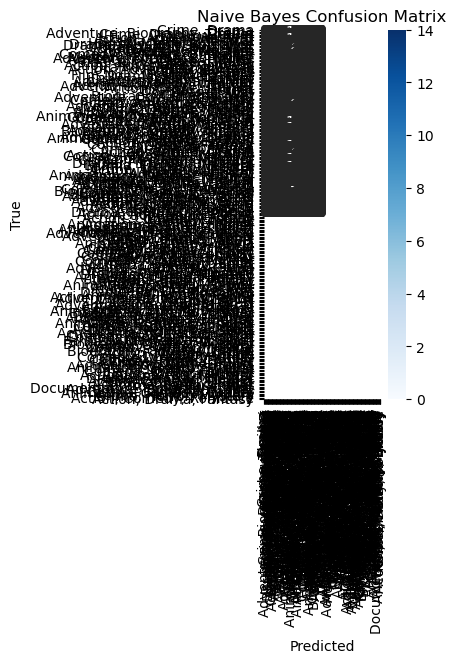

In [14]:
plt.subplot(1, 3, 1)
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=data['Genre'].unique(), yticklabels=data['Genre'].unique())
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

Text(225.781045751634, 0.5, 'True')

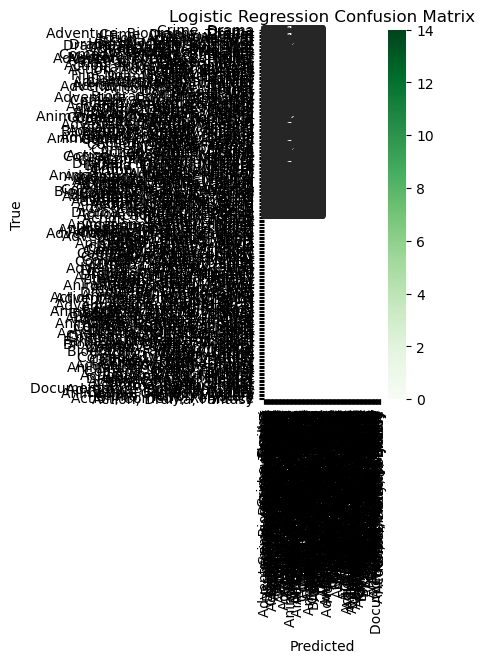

In [15]:
plt.subplot(1, 3, 2)
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Greens", xticklabels=data['Genre'].unique(), yticklabels=data['Genre'].unique())
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")


Text(400.83986928104576, 0.5, 'True')

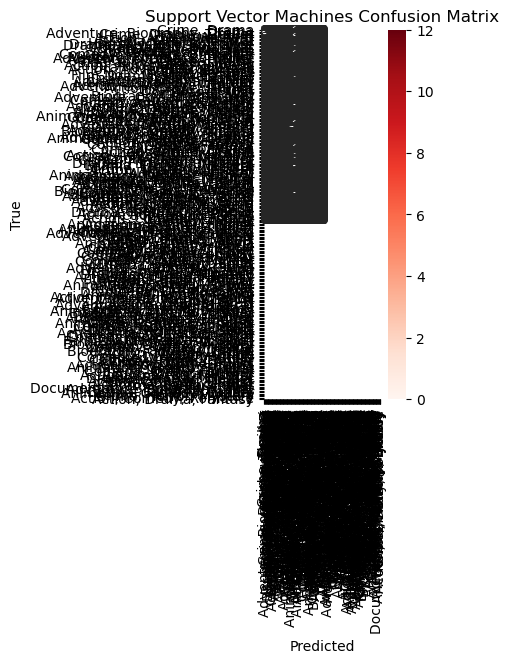

In [16]:
plt.subplot(1, 3, 3)
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Reds", xticklabels=data['Genre'].unique(), yticklabels=data['Genre'].unique())
plt.title("Support Vector Machines Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>